Je vais travailer sur le Dax, pour l'instant je n'ai pas encore d'idée concernant les features que je vais utiliser mais au fil du temps je vais définir de façon concrète le modèle vers lequel je vais m'orienter.

In [7]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = yf.download(tickers = "^GDAXI", period = "max")
data['returns'] = ((data['Close'].shift(0) - data['Close'].shift(1))/data['Close'].shift(1))*100
data.tail(10)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,returns
Ticker,^GDAXI,^GDAXI,^GDAXI,^GDAXI,^GDAXI,^GDAXI,
Date,,,,,,,
2024-10-21 00:00:00+00:00,19461.189453,19461.189453,19645.019531,19451.720703,19609.419922,41631500,-0.997996
2024-10-22 00:00:00+00:00,19421.910156,19421.910156,19591.490234,19368.689453,19528.910156,54438000,-0.201834
2024-10-23 00:00:00+00:00,19377.619141,19377.619141,19464.539062,19330.109375,19399.330078,52260500,-0.228047
2024-10-24 00:00:00+00:00,19443.000000,19443.000000,19555.449219,19417.730469,19417.730469,55469100,0.337404
2024-10-25 00:00:00+00:00,19463.589844,19463.589844,19516.240234,19388.910156,19419.519531,46014500,0.105898
2024-10-28 00:00:00+00:00,19531.619141,19531.619141,19570.919922,19399.160156,19528.669922,46669100,0.349521
2024-10-29 00:00:00+00:00,19478.070312,19478.070312,19643.119141,19465.000000,19634.330078,46982400,-0.274165
2024-10-30 00:00:00+00:00,19257.339844,19257.339844,19420.939453,19201.240234,19403.429688,59541100,-1.133226


Text(0, 0.5, 'returns')

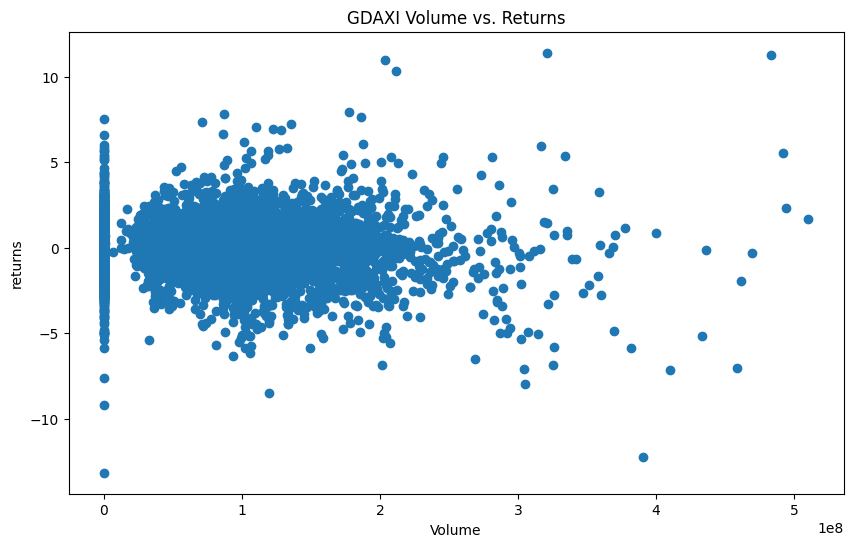

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['returns'])
plt.title('GDAXI Volume vs. Returns')
plt.xlabel('Volume')
plt.ylabel('returns')


In [8]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [9]:
def model (X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [10]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [11]:
def gradient(A, X, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum (A - y)
    return (dW, db)

In [12]:
def update (dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

In [ ]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    W, b = initialisation(X)
    
    Loss = []

    for i in range (n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradient( A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.xlabel('Iterations')
    plt.ylabel('Log Loss')
    plt.title('Log Loss vs. Iterations')
    plt.show()

    return(W,b)

In [16]:
W,b = artificial_neuron(X, y)

NameError: name 'X' is not defined